In [35]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

In [36]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

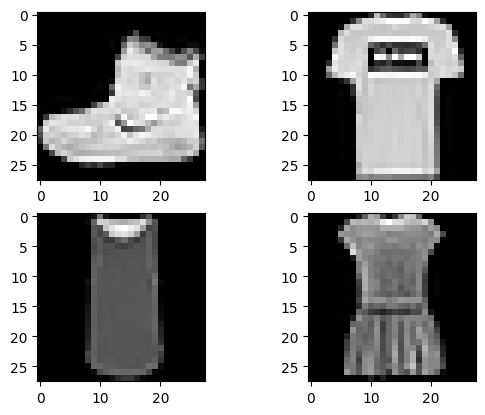

In [37]:
#Q1
seed = 7
np.random.seed(seed)
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.show()

In [38]:
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

# one hot encode outputs (0000000001, 0000000010, 0000000100 ...)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [39]:
num_classes = y_test.shape[1]

def baseline_model():
# create model
 model = Sequential()
 model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
# Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model


# build the model
model = baseline_model()
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 12s - 40ms/step - accuracy: 0.8220 - loss: 0.5096 - val_accuracy: 0.8464 - val_loss: 0.4330
Epoch 2/10
300/300 - 5s - 16ms/step - accuracy: 0.8684 - loss: 0.3700 - val_accuracy: 0.8615 - val_loss: 0.3858
Epoch 3/10
300/300 - 6s - 20ms/step - accuracy: 0.8817 - loss: 0.3306 - val_accuracy: 0.8697 - val_loss: 0.3627
Epoch 4/10
300/300 - 4s - 15ms/step - accuracy: 0.8907 - loss: 0.3031 - val_accuracy: 0.8762 - val_loss: 0.3538
Epoch 5/10
300/300 - 6s - 22ms/step - accuracy: 0.8958 - loss: 0.2850 - val_accuracy: 0.8772 - val_loss: 0.3393
Epoch 6/10
300/300 - 9s - 29ms/step - accuracy: 0.9017 - loss: 0.2682 - val_accuracy: 0.8837 - val_loss: 0.3281
Epoch 7/10
300/300 - 6s - 19ms/step - accuracy: 0.9066 - loss: 0.2552 - val_accuracy: 0.8738 - val_loss: 0.3421
Epoch 8/10
300/300 - 4s - 15ms/step - accuracy: 0.9105 - loss: 0.2431 - val_accuracy: 0.8831 - val_loss: 0.3255
Epoch 9/10
300/300 - 5s - 16ms/step - accuracy: 0.9140 - loss: 0.2316 - val_accuracy: 0.8823 - val_loss

Using the default parameters from hw3 the baseline error is much higher than in hw1. 11.53% compared to 1.82% Therefore the parameters given for MNIST are not ideal for fashion_MNIST. This could be because fashion MNIST dataset is more complex since clothing has more variance in each class than digit classes. However the following models will still be tested from hw1 to see how the changes effect the relative error even though it will still be high and then changes will be made to make a more accurate model.

In [40]:
# define baseline model
def baseline_model():
# create model
 model = Sequential()
 model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='leaky_relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
# Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
 return model


# build the model
model = baseline_model()
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 6s - 20ms/step - accuracy: 0.5746 - loss: 1.4553 - val_accuracy: 0.6597 - val_loss: 1.1061
Epoch 2/10
300/300 - 10s - 34ms/step - accuracy: 0.6898 - loss: 0.9787 - val_accuracy: 0.7078 - val_loss: 0.9058
Epoch 3/10
300/300 - 9s - 30ms/step - accuracy: 0.7290 - loss: 0.8437 - val_accuracy: 0.7330 - val_loss: 0.8164
Epoch 4/10
300/300 - 5s - 18ms/step - accuracy: 0.7530 - loss: 0.7724 - val_accuracy: 0.7487 - val_loss: 0.7614
Epoch 5/10
300/300 - 9s - 31ms/step - accuracy: 0.7687 - loss: 0.7256 - val_accuracy: 0.7626 - val_loss: 0.7233
Epoch 6/10
300/300 - 6s - 21ms/step - accuracy: 0.7790 - loss: 0.6915 - val_accuracy: 0.7723 - val_loss: 0.6948
Epoch 7/10
300/300 - 4s - 14ms/step - accuracy: 0.7880 - loss: 0.6651 - val_accuracy: 0.7801 - val_loss: 0.6716
Epoch 8/10
300/300 - 6s - 21ms/step - accuracy: 0.7941 - loss: 0.6437 - val_accuracy: 0.7864 - val_loss: 0.6529
Epoch 9/10
300/300 - 4s - 14ms/step - accuracy: 0.7999 - loss: 0.6260 - val_accuracy: 0.7902 - val_loss

This model changes activation function to leaky_relu from relu and changes optimizer to adagrad from adam. It results in a baseline error of 20.5% compared 11.53% of the default parameters. The MNIST dataset also did not perform well with these changes. Therefore it appears that these changes are not beneficial for these types of models. Adagrad optimizers do not perform as well as adam optimizer for high dimentional data. Both MNIST and fashion MNIST contain high dimentional inputs in the form of images. That could explain why the error is significantly higher for both.

In [41]:
def baseline_model():
# create model
 model = Sequential()
 model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
# Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model


# build the model
model = baseline_model()
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
1875/1875 - 16s - 9ms/step - accuracy: 0.8331 - loss: 0.4672 - val_accuracy: 0.8437 - val_loss: 0.4165
Epoch 2/10
1875/1875 - 20s - 11ms/step - accuracy: 0.8704 - loss: 0.3548 - val_accuracy: 0.8673 - val_loss: 0.3691
Epoch 3/10
1875/1875 - 20s - 11ms/step - accuracy: 0.8824 - loss: 0.3201 - val_accuracy: 0.8595 - val_loss: 0.3730
Epoch 4/10
1875/1875 - 21s - 11ms/step - accuracy: 0.8913 - loss: 0.2942 - val_accuracy: 0.8717 - val_loss: 0.3465
Epoch 5/10
1875/1875 - 20s - 10ms/step - accuracy: 0.8977 - loss: 0.2752 - val_accuracy: 0.8762 - val_loss: 0.3513
Epoch 6/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9032 - loss: 0.2604 - val_accuracy: 0.8802 - val_loss: 0.3338
Epoch 7/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9080 - loss: 0.2473 - val_accuracy: 0.8874 - val_loss: 0.3196
Epoch 8/10
1875/1875 - 14s - 8ms/step - accuracy: 0.9110 - loss: 0.2375 - val_accuracy: 0.8802 - val_loss: 0.3460
Epoch 9/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9161 - loss: 0.2255 - val_acc

The next change is to reduce the batch size from 200 to 32. This makes training time longer but it can result in better performance since there are more updates occuring. However another downside can be more noise in the individual batches which result in more unstable training. In this case error is 10.68% from 11.53% For MNIST the error did not change but for fashion MNIST this is better. That could be because of the more freuqently updated model.

In [42]:
def baseline_model():
# create model
 model = Sequential()
 model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
# Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model


# build the model
model = baseline_model()
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/20
300/300 - 6s - 20ms/step - accuracy: 0.8246 - loss: 0.5055 - val_accuracy: 0.8528 - val_loss: 0.4217
Epoch 2/20
300/300 - 10s - 32ms/step - accuracy: 0.8645 - loss: 0.3776 - val_accuracy: 0.8639 - val_loss: 0.3837
Epoch 3/20
300/300 - 6s - 19ms/step - accuracy: 0.8793 - loss: 0.3325 - val_accuracy: 0.8754 - val_loss: 0.3555
Epoch 4/20
300/300 - 4s - 15ms/step - accuracy: 0.8891 - loss: 0.3043 - val_accuracy: 0.8782 - val_loss: 0.3467
Epoch 5/20
300/300 - 5s - 17ms/step - accuracy: 0.8951 - loss: 0.2856 - val_accuracy: 0.8716 - val_loss: 0.3591
Epoch 6/20
300/300 - 5s - 18ms/step - accuracy: 0.8992 - loss: 0.2728 - val_accuracy: 0.8774 - val_loss: 0.3383
Epoch 7/20
300/300 - 10s - 34ms/step - accuracy: 0.9050 - loss: 0.2554 - val_accuracy: 0.8836 - val_loss: 0.3228
Epoch 8/20
300/300 - 5s - 15ms/step - accuracy: 0.9106 - loss: 0.2429 - val_accuracy: 0.8893 - val_loss: 0.3166
Epoch 9/20
300/300 - 5s - 17ms/step - accuracy: 0.9140 - loss: 0.2332 - val_accuracy: 0.8823 - val_los

The next change increases the number of epochs to 20 from 10. for MNIST dataset this results in a lower error but for fashion mnist it results in 10.43% error from 11.53%. This could be because the model is more complex so it needs more epochs to better understand the complexity.  Notice how the validation accuracy of epoch 20 is lower than epoch 19 which is lower htan epich 18 which is lower than the highest score. Validation accuracy does not always result in a more accurate model in deployment when the differences are this small but that can be why many models use early stopping metrics to prevent overfitting.

In [ ]:
def baseline_model():
# create model
 model = Sequential()
 model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
 model.add(Dense(128, activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
# Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model


# build the model
model = baseline_model()
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 7s - 22ms/step - accuracy: 0.8170 - loss: 0.5248 - val_accuracy: 0.8515 - val_loss: 0.4145
Epoch 2/10
300/300 - 6s - 18ms/step - accuracy: 0.8670 - loss: 0.3683 - val_accuracy: 0.8669 - val_loss: 0.3687
Epoch 3/10
300/300 - 6s - 20ms/step - accuracy: 0.8828 - loss: 0.3203 - val_accuracy: 0.8771 - val_loss: 0.3464
Epoch 4/10
300/300 - 5s - 17ms/step - accuracy: 0.8905 - loss: 0.2976 - val_accuracy: 0.8734 - val_loss: 0.3501
Epoch 5/10
300/300 - 6s - 21ms/step - accuracy: 0.8978 - loss: 0.2770 - val_accuracy: 0.8793 - val_loss: 0.3363
Epoch 6/10
300/300 - 11s - 38ms/step - accuracy: 0.9047 - loss: 0.2589 - val_accuracy: 0.8868 - val_loss: 0.3101
Epoch 7/10
300/300 - 8s - 26ms/step - accuracy: 0.9072 - loss: 0.2490 - val_accuracy: 0.8839 - val_loss: 0.3191
Epoch 8/10
300/300 - 6s - 21ms/step - accuracy: 0.9106 - loss: 0.2377 - val_accuracy: 0.8911 - val_loss: 0.3086
Epoch 9/10
300/300 - 9s - 30ms/step - accuracy: 0.9160 - loss: 0.2262 - val_accuracy: 0.8810 - val_loss

Since it appears that fashion MNIST is more complex it may be expected that adding an extra dense layer may be able to handle the complexity and result in a lower error value. Just like MNIST, adding this extra layer also results in higher error values. Even if a model is more complex, adding extra layers can make the model worse due to overfitting. Based on these examples so far it demostrates how different parameter changes have varying effects on different datasets.

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

def baseline_model():
# create model
 model = Sequential()
 model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
 model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
 model.add(tf.keras.layers.Dropout(0.3))
 model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
 model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
 model.add(tf.keras.layers.Dropout(0.3))
 model.add(tf.keras.layers.Flatten())
 model.add(tf.keras.layers.Dense(256, activation='relu'))
 model.add(tf.keras.layers.Dropout(0.5))
 model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

# build the model
model = baseline_model()
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 79s - 264ms/step - accuracy: 0.7391 - loss: 0.7073 - val_accuracy: 0.8392 - val_loss: 0.4439
Epoch 2/10
300/300 - 90s - 300ms/step - accuracy: 0.8343 - loss: 0.4566 - val_accuracy: 0.8619 - val_loss: 0.3779
Epoch 3/10
300/300 - 134s - 447ms/step - accuracy: 0.8530 - loss: 0.4055 - val_accuracy: 0.8746 - val_loss: 0.3439
Epoch 4/10
300/300 - 78s - 261ms/step - accuracy: 0.8648 - loss: 0.3747 - val_accuracy: 0.8816 - val_loss: 0.3231
Epoch 5/10
300/300 - 85s - 282ms/step - accuracy: 0.8716 - loss: 0.3509 - val_accuracy: 0.8859 - val_loss: 0.3104
Epoch 6/10
300/300 - 78s - 261ms/step - accuracy: 0.8766 - loss: 0.3351 - val_accuracy: 0.8917 - val_loss: 0.2936
Epoch 7/10
300/300 - 82s - 273ms/step - accuracy: 0.8834 - loss: 0.3228 - val_accuracy: 0.8951 - val_loss: 0.2848
Epoch 8/10
300/300 - 89s - 298ms/step - accuracy: 0.8862 - loss: 0.3119 - val_accuracy: 0.8993 - val_loss: 0.2749
Epoch 9/10
300/300 - 133s - 444ms/step - accuracy: 0.8900 - loss: 0.3018 - val_accuracy

For this example a different model architecture was used. Instead of pure dense layers, convolutional layers and pooling layers are used with dropout, flatten and dense layers. Convolutional Neural Networks can be very effective when dealing with image datasets because they are typically better extracting features when compared to pure dense layers. Feature extraction is very important for the complex data of fashion MNIST so in theory this model should perform better than the previous examples. The prediction is valid as the error drops to 9.51% from 11.1%, however that is stil a high value. Fashion MNIST is very complicated and will require more advanced models and techniques as well as parameter tuning to achive a significany lower error rate. According to the fashion mnist github (https://github.com/zalandoresearch/fashion-mnist) one of the highest scoring models for mnist is a wide resnet model with 8.9 million parameters. Wide ResNets are residual netoworks with more input channels. A residual network will skip some layers and pass to deeper layers which can help performance since if a layer hurts performance as is shown by the accuracies in some of the epoch it can be skipped by the regularization. Clearly though the network must be rather deep or else key information will be missed due to the shallowness of the model. The examples here are too shallow to construct a residual network.

# Q2
Images with titles will lead to better classification models. This is beacause feature extraction is very important part of classifying images. Images with titles will likley be more accurate in feature extraction because it understands which features belong to each class. Without the titles, the features selected may be arbitrary and not be a set of features unique to the class. Especially when an image dataset contains similar classes, for example classifying different bird species, an unlabeled data input will likley not be able to perform well since many features extracted are shared with the other classes. It will be beneficial to identify each bird species first with labeled data so the model can learn what features differentiate it from other classes. Suppose though that an image dataset contains classes which are very different, such as identifying red apples, oranges and bananas. The model will be able to pick up the clear difference being the colors and likley will perform well unlabeled so performance may be similar compared to labeled due to the clear and dominate differences. However, more common sets are much more noisy and ambigious in relation to the classification problem. Therefore labeled images will result in better performance.  
